In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest 

In [2]:
ab_data = pd.read_csv('data/ab_data.zip')

ab_data

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1
...,...,...,...,...
290477,751197,2017-01-03,A,0
290478,945152,2017-01-12,A,0
290479,734608,2017-01-22,A,0
290480,697314,2017-01-15,A,0


In [3]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [4]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'])
ab_data['group'] = ab_data['group'].astype('category')

ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    290482 non-null  int64         
 1   timestamp  290482 non-null  datetime64[ns]
 2   group      290482 non-null  category      
 3   converted  290482 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 6.9 MB


In [5]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})

daily_data

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797
5,2017-01-04,B,6538,763
6,2017-01-05,A,6419,791
7,2017-01-05,B,6509,743
8,2017-01-06,A,6604,762
9,2017-01-06,B,6735,834


In [6]:
data_piv = daily_data.copy()

data_piv['conversion'] = daily_data['converted'] / daily_data['users_count'] * 100

data_piv

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361
5,2017-01-04,B,6538,763,11.670236
6,2017-01-05,A,6419,791,12.322792
7,2017-01-05,B,6509,743,11.414964
8,2017-01-06,A,6604,762,11.538462
9,2017-01-06,B,6735,834,12.383073


In [7]:
data_piv[data_piv['timestamp'] == '2017-01-05'][data_piv['group'] == 'A']['conversion'].round(2)

C:\Users\Виктория\AppData\Local\Temp\ipykernel_6192\1583281862.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_piv[data_piv['timestamp'] == '2017-01-05'][data_piv['group'] == 'A']['conversion'].round(2)


6    12.32
Name: conversion, dtype: float64

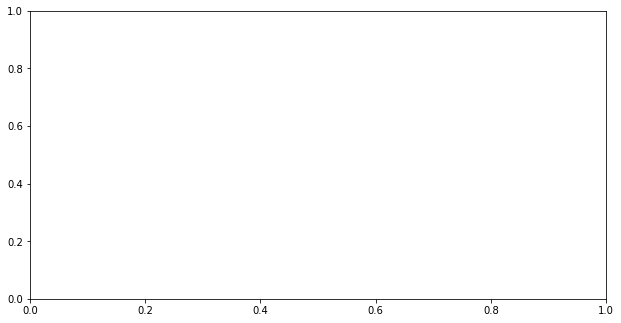

In [8]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([1, 1, 1, 1])


<AxesSubplot:xlabel='conversion', ylabel='group'>

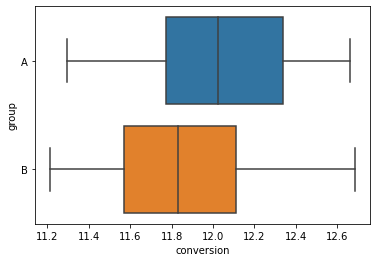

In [9]:
sns.boxplot(data=data_piv, 
            x='conversion', 
            y='group')

In [10]:
conversion_piv = data_piv.groupby('group')['conversion'].agg(['mean', 'median'])

conversion_piv

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


In [11]:
conversion_piv['mean'] - conversion_piv['median']

group
A    0.008615
B    0.043116
dtype: float64

<AxesSubplot:xlabel='timestamp', ylabel='conversion'>

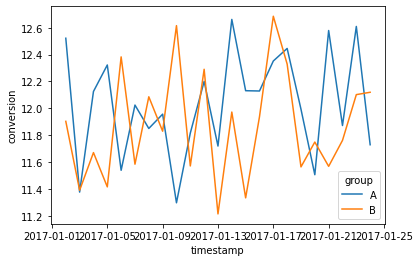

In [12]:
sns.lineplot(data=data_piv,
             x='timestamp', 
             y='conversion',
             hue='group')

In [13]:
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()

daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()

daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100

daily_data

,timestamp,group,users_count,converted,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,2851,357,12.521922
1,2017-01-02,B,2848,339,2848,339,11.903090
2,2017-01-03,A,6584,749,9435,1106,11.722311
3,2017-01-03,B,6620,754,9468,1093,11.544149
4,2017-01-04,A,6573,797,16008,1903,11.887806
5,2017-01-04,B,6538,763,16006,1856,11.595652
6,2017-01-05,A,6419,791,22427,2694,12.012307
7,2017-01-05,B,6509,743,22515,2599,11.543416
8,2017-01-06,A,6604,762,29031,3456,11.904516
9,2017-01-06,B,6735,834,29250,3433,11.736752


<AxesSubplot:xlabel='timestamp', ylabel='cum_conversion'>

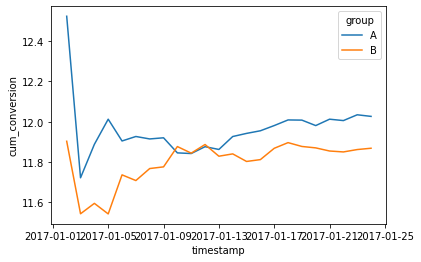

In [14]:
sns.lineplot(data=daily_data, 
             x='timestamp', 
             y='cum_conversion', 
             hue='group')

In [15]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.zip')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.zip')

In [16]:
sample_a['date'] = pd.to_datetime(sample_a['date'])

sampiv_a = sample_a.groupby('date', as_index=False).agg({'cid': 'count', 
                                                         'transactions': 'sum', 
                                                         'revenue': 'sum'})

sampiv_a

,date,cid,transactions,revenue
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051
3,2020-11-09,3234,18,708830
4,2020-11-10,3022,29,826984
5,2020-11-11,3218,19,1209656
6,2020-11-12,3467,19,607839
7,2020-11-13,3676,36,1338816
8,2020-11-14,3372,30,2659277
9,2020-11-15,3881,27,1189970


In [17]:
sampiv_a[sampiv_a['date'] == '2020-11-08']

,date,cid,transactions,revenue
2,2020-11-08,3354,25,846051


In [18]:
sample_b['date'] = pd.to_datetime(sample_b['date'])

sampiv_b = sample_b.groupby('date', as_index=False).agg({'cid': 'count', 
                                                         'transactions': 'sum', 
                                                         'revenue': 'sum'})

sampiv_b

,date,cid,transactions,revenue
0,2020-11-06,2499,19,996645
1,2020-11-07,2804,19,555499
2,2020-11-08,3291,24,3044842
3,2020-11-09,3062,25,1285836
4,2020-11-10,3072,30,2414726
5,2020-11-11,3208,22,3555727
6,2020-11-12,3494,25,915653
7,2020-11-13,3606,37,1703475
8,2020-11-14,3276,34,2369998
9,2020-11-15,3919,27,1147144


In [19]:
sampiv_a['cumcid'] = sampiv_a['cid'].cumsum()

sampiv_a['cumtrans'] = sampiv_a['transactions'].cumsum()

sampiv_a['cumrev'] = sampiv_a['revenue'].cumsum()

sampiv_a['cumconv'] = sampiv_a['cumtrans'] / sampiv_a['cumcid'] * 100

sampiv_a['cumcheck'] = sampiv_a['cumrev'] / sampiv_a['cumtrans']

sampiv_a

sampiv_a['cumconv'].mean().round(2)

0.71

In [20]:
sampiv_b['cumcid'] = sampiv_b['cid'].cumsum()

sampiv_b['cumtrans'] = sampiv_b['transactions'].cumsum()

sampiv_b['cumrev'] = sampiv_b['revenue'].cumsum()

sampiv_b['cumconv'] = sampiv_b['cumtrans'] / sampiv_b['cumcid'] * 100

sampiv_b['cumcheck'] = sampiv_b['cumrev'] / sampiv_b['cumtrans']

sampiv_b

sampiv_b['cumconv'].mean().round(2)

0.76

In [21]:
sampiv_a

,date,cid,transactions,revenue,cumcid,cumtrans,cumrev,cumconv,cumcheck
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.937500
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,84593.974359
2,2020-11-08,3354,25,846051,8634,64,4145216,0.741256,64769.000000
3,2020-11-09,3234,18,708830,11868,82,4854046,0.690934,59195.682927
4,2020-11-10,3022,29,826984,14890,111,5681030,0.745467,51180.450450
5,2020-11-11,3218,19,1209656,18108,130,6890686,0.717915,53005.276923
6,2020-11-12,3467,19,607839,21575,149,7498525,0.690614,50325.671141
7,2020-11-13,3676,36,1338816,25251,185,8837341,0.732644,47769.410811
8,2020-11-14,3372,30,2659277,28623,215,11496618,0.751144,53472.641860
9,2020-11-15,3881,27,1189970,32504,242,12686588,0.744524,52423.917355


<Axes:xlabel='date', ylabel='cumconv'>

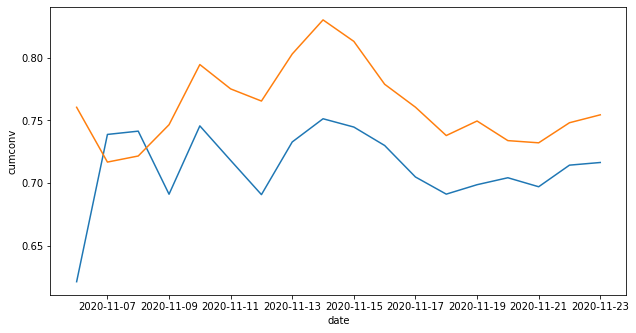

In [22]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_axes([1, 1, 1, 1])

sns.lineplot(data=sampiv_a, 
             x='date', 
             y='cumconv')

sns.lineplot(data=sampiv_b, 
             x='date', 
             y='cumconv')

<AxesSubplot:xlabel='date', ylabel='cumcheck'>

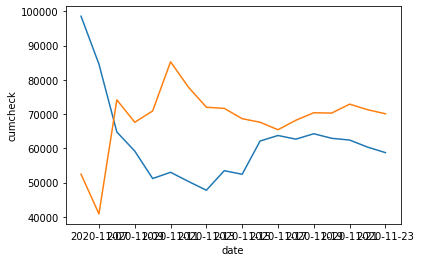

In [23]:
sns.lineplot(data=sampiv_a, 
             x='date', 
             y='cumcheck')

sns.lineplot(data=sampiv_b, 
             x='date', 
             y='cumcheck')

In [24]:
converted_piv= ab_data.groupby('group')['converted'].agg(['sum', 'count'])

converted_piv

,sum,count
group,,
A,17467,145241
B,17238,145241


In [25]:

H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'
alpha = 0.05 

_, pvalue = proportions_ztest(
    count=converted_piv['sum'], #число "успехов"
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='larger',
)


print('p-value: ', round(pvalue, 2))

if pvalue < alpha: 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  0.1
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


In [27]:
from modules.cumcalc import get_cumseries

samp_ab = pd.concat([sample_a, sample_b])
 

get_cumseries(data=samp_ab, cols=['cid', 'transactions', 'revenue'])

,date,cid,transactions,revenue,group,cum_cid,cum_transactions,cum_revenue
0,2020-11-06,1.001648e+09,0,0,A,1.001648e+09,0,0
1,2020-11-06,1.001936e+09,0,0,A,2.003584e+09,0,0
2,2020-11-06,1.003214e+08,0,0,A,2.103905e+09,0,0
3,2020-11-06,1.004393e+09,0,0,A,3.108298e+09,0,0
4,2020-11-06,1.006382e+09,0,0,A,4.114680e+09,0,0
...,...,...,...,...,...,...,...,...
61378,2020-11-23,9.965675e+08,0,0,B,1.325033e+14,904,58363408
61379,2020-11-23,9.970803e+07,0,0,B,1.325034e+14,904,58363408
61380,2020-11-23,9.984814e+08,0,0,B,1.325044e+14,904,58363408
61381,2020-11-23,9.991118e+08,0,0,B,1.325054e+14,904,58363408
